# Read and Visualize stock and  economic data

## S&P stock index

[The S&P Stock Market data](https://finance.yahoo.com/quote/%5EGSPC?p=^GSPC) 
is a weighted index of the 500 largest publicly traded companies (by market capitalisation) in the US stock market. It is often considered an equities "benchmark", and many consider it one of the best representations of the U.S. stock market.

Let us access S&P online data from YAHOO finance through [pandas "DataReader"](http://pandas-datareader.readthedocs.io/en/latest/remote_data.html).
Once imported as data frame, we will then visulize market trends in stock's closing, high, low prices etc. 
We will fetch data for the year 2017.

In [2]:
# Get stock data for S&P500
from datetime import date
from pandas_datareader.data import DataReader
ticker = '^GSPC'
data_source = 'yahoo'
start = date(2017,1,1)
end = date(2017,12,31)
ts = DataReader(ticker,data_source,start,end)
ts.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 251 entries, 2017-01-03 to 2017-12-29
Data columns (total 6 columns):
Open         251 non-null float64
High         251 non-null float64
Low          251 non-null float64
Close        251 non-null float64
Adj Close    251 non-null float64
Volume       251 non-null int64
dtypes: float64(5), int64(1)
memory usage: 13.7 KB


You can see that data frame has datetime index with 251 entries (one row for each day) starting from 3rd Jan 2017 (the first trading day for 2017) to 29th Dec 2017 (the last trading day for 2017). There are 5 columns: first four columns summarize the price distribution for any given day: 
- 'Open' is First price
- 'High' is Highest price
- 'Low' is Lowest price
- 'Close' is Last price
- 'Volume' is number of shares traded on any day.

## Visualization of time-series

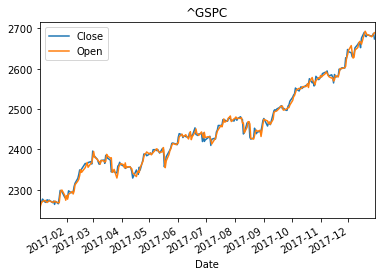

In [3]:
#visualize the stock price trend
import matplotlib.pyplot as plt
ts['Close'].plot(title=ticker)
ts['Open'].plot(title=ticker)
plt.legend()
plt.show()

You can see stock price reached it's height by the end of the year 2017!

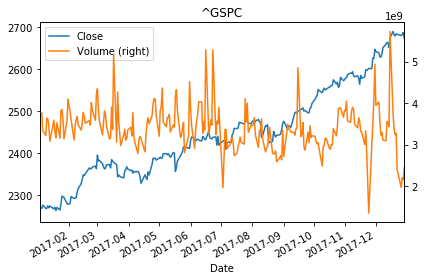

In [4]:
ts = ts.loc[:,['Close','Volume']]
ts.plot(title=ticker, secondary_y='Volume')
plt.tight_layout()
plt.show()

## Bonds vs Stocks

These are the most important investment options. Let us fetch data from FRED and compare the performance of both. We will use "Total Return Index" for each class, which accounts for returns due to both price increases and payments like interest or dividends. 
Let us use the Bank of America Merrill Lynch US High Yield Total Return Index Value [BAMLHYH0A0HYM2TRIV](https://fred.stlouisfed.org/series/BAMLHYH0A0HYM2TRIV) for bonds and the S&P500 Index [SP500](https://fred.stlouisfed.org/series/SP500) for stocks. 

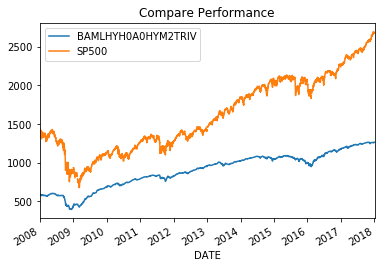

In [5]:
# start date
start = date(2008, 1, 1)
# series code
series = ['BAMLHYH0A0HYM2TRIV', 'SP500']
# Import the data
data = DataReader(series, 'fred', start)
# Plot the results
data.plot(title="Compare Performance")
# Show the plot
plt.show()

# Interest Rates

Let us get the interest rates data for past [few years](https://fred.stlouisfed.org/series/DGS10) from [FRED portal](https://fred.stlouisfed.org/) and visualize the trend.

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 14609 entries, 1962-01-02 to 2017-12-29
Data columns (total 1 columns):
DGS10    13985 non-null float64
dtypes: float64(1)
memory usage: 228.3 KB


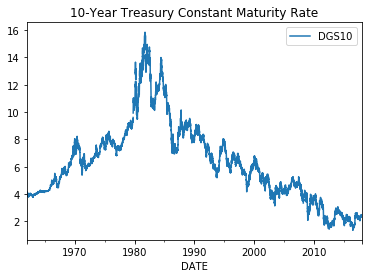

In [6]:
start = date(1962, 1, 1)
series = 'DGS10'
data_source = 'fred'
# Import the data
ir = DataReader(series, data_source, start)
# Inspect the data
ir.info()
#plot the interest rates 
ir.plot(title='10-Year Treasury Constant Maturity Rate')
# Show the plot
plt.show()

## Gold Price

Let us now retrieve data from Federal Reserve Economic Data (FRED) portal. We will visualize the gold price trend over the last 50 years for [Gold Fixing Price 10.30 AM in London Bullion Market](https://en.wikipedia.org/wiki/Gold_fixing).

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 12983 entries, 1968-04-01 to 2018-01-03
Data columns (total 1 columns):
GOLDAMGBD228NLBM    12582 non-null float64
dtypes: float64(1)
memory usage: 202.9 KB


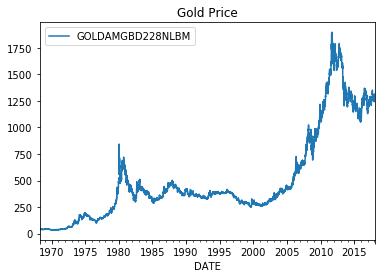

In [7]:
# Set start date
start = date(1968, 1, 1)
series = 'GOLDAMGBD228NLBM'
# Import the data
gold_price = DataReader(series, 'fred', start=start)
# Inspect the price of gold
gold_price.info()
# Plot the price of gold
gold_price.plot(title='Gold Price')
# Show the plot
plt.show()

## Oil Price VS Exxon Mobile Corporation

Let us get data for ["West Texas Intermediate Oil Price"](https://fred.stlouisfed.org/series/DCOILWTICO) from FRED portal and compare to stock price of ["Exxon Mobile Corporation"](https://finance.yahoo.com/quote/XOM/).

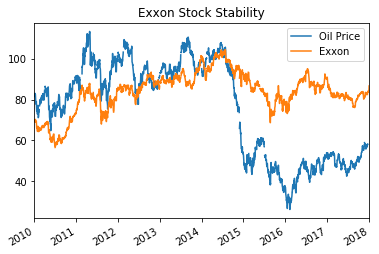

In [8]:
import pandas as pd
# Set start date
start = date(2010, 1, 1)
# Import oil price data
series = 'DCOILWTICO'
oil_price = DataReader(series, 'fred', start=start)
# Import Exxon Mobile Corp stock data
ticker = 'XOM'
exxon = DataReader(ticker, 'yahoo', start)
# create a dataframe by combining oil price and stock data
data = pd.concat([oil_price,exxon['Close']], axis=1)
#rename columns
data.columns = ['Oil Price','Exxon']
# Plot both
data.plot(title='Exxon Stock Stability')
# Show the plot
plt.show()

Note that with drop in oil price for last few years, Exxon stock price is still stable!

## Visualize the stock prices for Top 5 Companies

 Let us import 2010 onwards stock price data for some of top companies, and then plot their closing price for the entire period!
 
 We will filter the stocks based on the market capitalization, or the combined value of all shares in a company. 
 
 - the five most valuable companies in the Consumer Services sector, 'Health Care', 'Energy', 'Technology', 'Basic Industries', 'Finance', 

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2015 entries, 2010-01-04 to 2018-01-03
Data columns (total 5 columns):
AAPL    2015 non-null float64
AMZN    2015 non-null float64
FB      1416 non-null float64
GOOG    2015 non-null float64
MSFT    2015 non-null float64
dtypes: float64(5)
memory usage: 94.5 KB


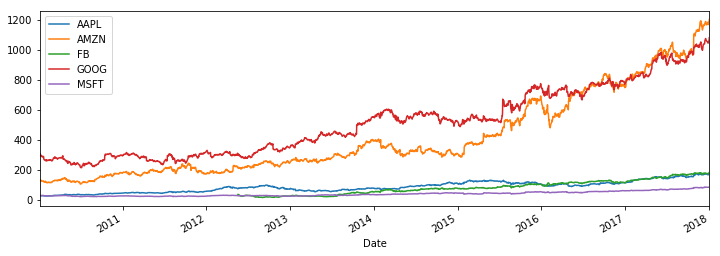

In [24]:
#tickers of 5 largest US companies based on Market Cap
tickers = ['AAPL','GOOG','MSFT','AMZN','FB']
panel = DataReader(tickers, 'yahoo', start=date(2010,1,1))
data = panel.to_frame()
unstack = data['Close'].unstack()
unstack.info()
unstack.plot(figsize=(12,4),label=tickers)
plt.legend()
plt.show()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2015 entries, 2018-01-03 to 2010-01-04
Data columns (total 5 columns):
BAC     2015 non-null float64
C       2015 non-null float64
HSBC    2015 non-null float64
JPM     2015 non-null float64
WFC     2015 non-null float64
dtypes: float64(5)
memory usage: 94.5 KB


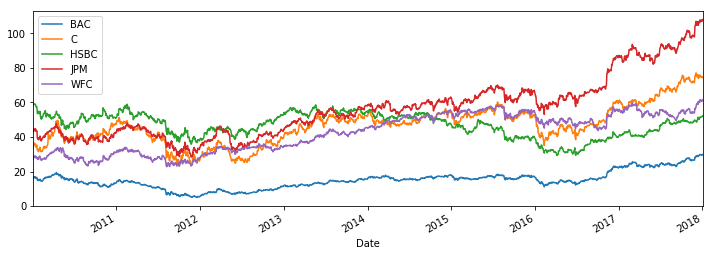

In [25]:
#tickers of 5 largest finance companies
tickers = ['BAC','C','HSBC','JPM','WFC']
panel = DataReader(tickers, 'yahoo', start=date(2010,1,1))
data = panel.to_frame()
unstack = data['Close'].unstack()
unstack.info()
unstack.plot(figsize=(12,4),label=tickers)
plt.legend()
plt.show()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2015 entries, 2018-01-03 to 2010-01-04
Data columns (total 5 columns):
AMZN     2015 non-null float64
CMCSA    2015 non-null float64
DIS      2015 non-null float64
HD       2015 non-null float64
WMT      2015 non-null float64
dtypes: float64(5)
memory usage: 94.5 KB


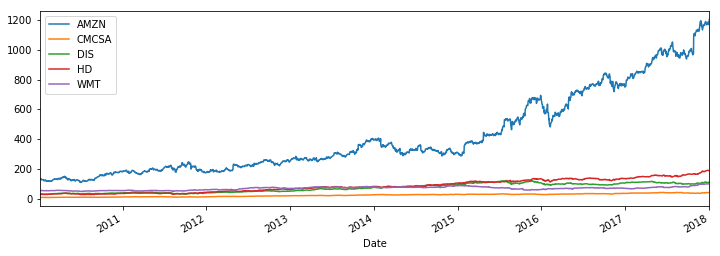

In [26]:
#tickers of 5 largest companies from consumer services sector
# Amazon, Walmart, Disney, Comcast, Home Depot
tickers = ['AMZN','WMT','DIS','CMCSA','HD']
panel = DataReader(tickers, 'yahoo', start=date(2010,1,1))
data = panel.to_frame()
unstack = data['Close'].unstack()
unstack.info()
unstack.plot(figsize=(12,4),label=tickers)
plt.legend()
plt.show()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2015 entries, 2010-01-04 to 2018-01-03
Data columns (total 5 columns):
AAPL     2015 non-null float64
FB       1416 non-null float64
GOOGL    2015 non-null float64
MSFT     2015 non-null float64
ORCL     2015 non-null float64
dtypes: float64(5)
memory usage: 94.5 KB


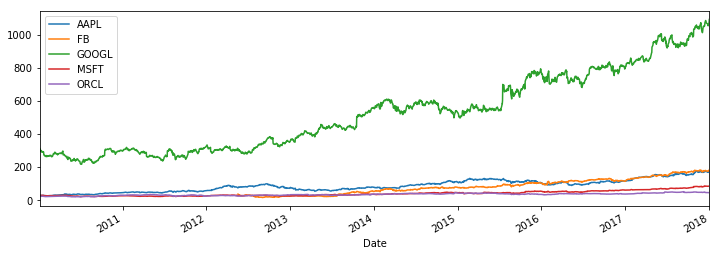

In [28]:
#tickers of 5 largest companies from technology sector
# Apple, Alphabet (google), MS corp, facebook, oracle
tickers = ['AAPL','GOOGL', 'MSFT','FB', 'ORCL']
panel = DataReader(tickers, 'yahoo', start=date(2010,1,1))
data = panel.to_frame()
unstack = data['Close'].unstack()
unstack.info()
unstack.plot(figsize=(12,4),label=tickers)
plt.legend()
plt.show()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2015 entries, 2018-01-03 to 2010-01-04
Data columns (total 5 columns):
JNJ    2015 non-null float64
MRK    2015 non-null float64
NVS    2015 non-null float64
PFE    2015 non-null float64
UNH    2015 non-null float64
dtypes: float64(5)
memory usage: 94.5 KB


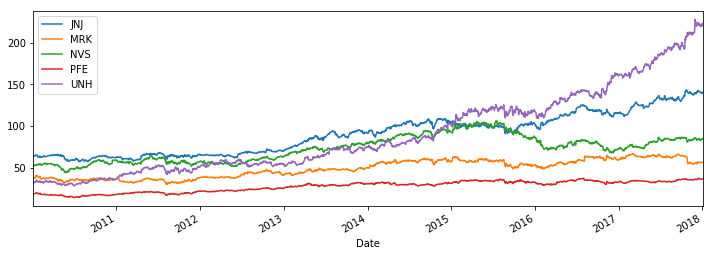

In [29]:
#tickers of 5 largest companies from Health care sector
# johnson n j, Pfizer, Novartis, Merck & comp, unitedhealth
tickers = ['JNJ','PFE', 'NVS','MRK', 'UNH']
panel = DataReader(tickers, 'yahoo', start=date(2010,1,1))
data = panel.to_frame()
unstack = data['Close'].unstack()
unstack.info()
unstack.plot(figsize=(12,4),label=tickers)
plt.legend()
plt.show()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2015 entries, 2018-01-03 to 2010-01-04
Data columns (total 6 columns):
BP     2015 non-null float64
CVX    2015 non-null float64
GE     2015 non-null float64
PTR    2015 non-null float64
TOT    2015 non-null float64
XOM    2015 non-null float64
dtypes: float64(6)
memory usage: 110.2 KB


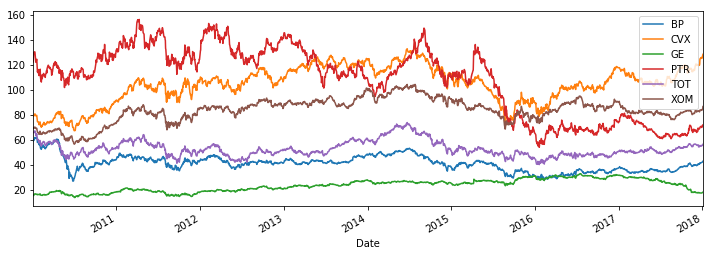

In [30]:
#tickers of 5 largest companies from Energy sector
# Exxon, GE, Chevron, PetroChina, Total S.A, BP
tickers = ['XOM','GE', 'CVX','PTR', 'TOT', 'BP']
panel = DataReader(tickers, 'yahoo', start=date(2010,1,1))
data = panel.to_frame()
unstack = data['Close'].unstack()
unstack.info()
unstack.plot(figsize=(12,4),label=tickers)
plt.legend()
plt.show()